In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import nrrd

In [2]:
file = "../data/Probe_190.raw"
assert  os.path.exists(file)

In [37]:
shape = [1085, 834, 2012]
shape = [ 834, 2012, 1085]
shape = [ 2012, 1085,834]
shape = [ 834,1085,2012]
shape = [ 2012,834,1085]
dtype = np.uint16

In [38]:
try:
    with open(file, 'rb') as f:
        raw_data = np.fromfile(f, dtype=dtype)
        # If you have a specific shape, reshape the array accordingly
        if shape:
            raw_data = raw_data.reshape(shape)
except FileNotFoundError:
    print(f"File  '{file}' not found.")
    raw_data = None

In [39]:
print("shape",raw_data.shape)
print("dtype",raw_data.dtype)
print("nbtyes",raw_data.nbytes)

shape (2012, 834, 1085)
dtype uint16
nbtyes 3641277360


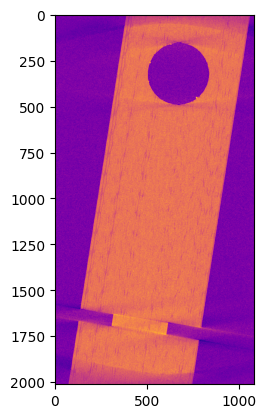

In [42]:
plt.imshow(raw_data[:,500,:],cmap="plasma")

In [47]:
out = {"raw": raw_data}

fout= os.path.splitext(file)[0] + ".h5"
print(fout)

../data/Probe_190.h5


In [48]:
with h5.File(fout, 'w',) as fout:
    for key in out.keys():
        if key == "volume_data":
            volume_group = fout.create_group('volume_data')
            for key, value in volume_data.items():
                volume_group.create_dataset(key, data=value)
        else:
            fout.create_dataset(key, data = out[key],compression="gzip")

In [49]:
def create_nrrd_header(size, spacing,space_origin, data_type='float', space='left-posterior-superior'):
    header = {
        'type': data_type,
        'dimension': len(size),
        'space dimension': len(size),
        'sizes': size,
        'space': space,
        'space origin': space_origin
    }

    if len(spacing) == len(size):
        header['space directions'] = np.diag(spacing).tolist()
        header['kinds'] = ['domain'] * len(size)

    header.update({
        'endian': 'little',
        'encoding': 'raw',
    })

    return header

In [50]:
data_type_seg = raw_data.dtype
size = raw_data.shape

spacing = (1,1,1)
space_origin = (0 , 0 , 0 )

header_seg = create_nrrd_header(size, spacing, space_origin, data_type_seg)

fileout = os.path.splitext(file)[0] +".vol.nrrd"


nrrd.write(os.path.join(fileout), raw_data,header=header_seg)